<a href="https://colab.research.google.com/github/sssylvia0/Uplift_Model/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

結果資料整理

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

##Round1

In [3]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/11月外匯名單_成效追蹤.csv', usecols=usecols)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1220046320,NaN,NaN,數位通路_換匯名單_F群_未發,0
1,A1221949610,NaN,數位通路_換匯名單_F群,NaN,1
2,A1224193120,NaN,數位通路_換匯名單_G群,NaN,1
3,A1228308980,NaN,數位通路_換匯名單_G群,NaN,1
4,A1228865070,NaN,數位通路_換匯名單_F群,NaN,1
...,...,...,...,...,...
105268,Y2725958190,NaN,數位通路_換匯名單_C群,NaN,1
105269,Y2727395520,NaN,NaN,數位通路_換匯名單_F群_未發,0
105270,Y2727650750,NaN,數位通路_換匯名單_F群,NaN,0
105271,Z1222922330,NaN,數位通路_換匯名單_G群,NaN,0


In [4]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-4-92a5edbb0bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-4-92a5edbb0bd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-4-92a5edbb0bd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1220046320,數位通路_換匯名單_F群_未發,0,0,0.0
1,A1221949610,數位通路_換匯名單_F群,1,1,0.0
2,A1224193120,數位通路_換匯名單_G群,1,1,0.0
3,A1228308980,數位通路_換匯名單_G群,1,1,0.0
4,A1228865070,數位通路_換匯名單_F群,1,1,0.0
...,...,...,...,...,...
105046,Y2725958190,數位通路_換匯名單_C群,1,1,0.0
105047,Y2727395520,數位通路_換匯名單_F群_未發,0,0,0.0
105048,Y2727650750,數位通路_換匯名單_F群,1,0,0.0
105049,Z1222922330,數位通路_換匯名單_G群,1,0,0.0


In [5]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 1
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1220046320,0,0,0.0,1,0,1,1
1,A1221949610,1,1,0.0,1,0,1,1
2,A1224193120,1,1,0.0,1,1,1,1
3,A1228308980,1,1,0.0,1,1,1,1
4,A1228865070,1,1,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...
105046,Y2725958190,1,1,0.0,0,0,1,1
105047,Y2727395520,0,0,0.0,1,0,1,1
105048,Y2727650750,1,0,0.0,1,0,1,1
105049,Z1222922330,1,0,0.0,1,1,1,1


In [6]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T = 0', 'Uplift_mean|T = 1', 'X_te_2', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202308_new.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1220046320,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823
1,A1221949610,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875
2,A1224193120,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594
3,A1228308980,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364
4,A1228865070,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806
...,...,...,...,...,...,...,...
105046,Y2725958190,0.007029,0.031847,0.004010,1656.168757,6539.039792,5027.934584
105047,Y2727395520,0.005046,0.030175,0.007685,686.915001,3642.971152,896.318976
105048,Y2727650750,0.005525,0.036715,0.008507,597.599400,3363.202331,1121.475990
105049,Z1222922330,0.005011,0.035214,0.035122,591.849539,3213.288381,974.855341


In [7]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202308_v1.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [8]:
#Feature X
X = pd.read_csv('/content/data202308_v1.csv', index_col=0)
#X[['換匯發送名單','TOTALNTAMOUNT', '跨售行為']]
# Create new DataFrame with the new columns inserted
insert_index = X.columns.get_loc('換匯基因標籤')+1
X.insert(insert_index, "近三個月是否發送過其他名單", [0] * len(X))
X.insert(insert_index, "外匯交易金額_近三個月", [0] * len(X))
X.insert(insert_index, "近三個月是否發送過外匯名單", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1220046320,73,0,1.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,A1221949610,75,0,1.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1
2,A1224193120,71,0,1.0,0,1500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
3,A1228308980,87,0,1.0,0,4500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
4,A1228865070,73,0,1.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105046,Y2725958190,56,0,2.0,0,1000.0,1,2,0,3,...,0,0,0,1,0,0,0,1,0,1
105047,Y2727395520,64,0,2.0,0,120.0,1,2,0,3,...,0,0,0,1,0,0,0,1,0,1
105048,Y2727650750,51,0,2.0,0,648.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
105049,Z1222922330,46,0,1.0,0,641.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0


In [9]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105046,Y2725958190,1,0,0,1,1,1,56,0,2.0,...,1,0,1,0.007029,0.031847,0.004010,1656.168757,6539.039792,5027.934584,0.0
105047,Y2727395520,1,1,0,1,0,0,64,0,2.0,...,1,0,1,0.005046,0.030175,0.007685,686.915001,3642.971152,896.318976,0.0
105048,Y2727650750,1,1,0,1,0,1,51,0,2.0,...,1,0,1,0.005525,0.036715,0.008507,597.599400,3363.202331,1121.475990,0.0
105049,Z1222922330,1,1,1,1,0,1,46,0,1.0,...,1,0,0,0.005011,0.035214,0.035122,591.849539,3213.288381,974.855341,0.0


In [10]:
#儲存結果
#Round1 105051 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

## Round2

In [11]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/12月外匯名單_成效追蹤_人.csv', usecols=usecols)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1422511920,NaN,NaN,數位通路_換匯名單_B群_未發,0
1,A1520164620,NaN,數位通路_換匯名單_F群,NaN,1
2,A1520193310,NaN,數位通路_換匯名單_B群,NaN,1
3,A1520212860,NaN,數位通路_換匯名單_B群,NaN,0
4,A1520293310,NaN,數位通路_換匯名單_G群,NaN,1
...,...,...,...,...,...
103831,Z1222213310,NaN,NaN,數位通路_換匯名單_F群_未發,0
103832,Z1222291870,NaN,數位通路_換匯名單_G群,NaN,1
103833,Z1229902750,NaN,NaN,數位通路_換匯名單_F群_未發,0
103834,Z2222847680,NaN,數位通路_換匯名單_A群,NaN,0


In [12]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-12-92a5edbb0bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-12-92a5edbb0bd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-12-92a5edbb0bd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1422511920,數位通路_換匯名單_B群_未發,0,0,0.0
1,A1520164620,數位通路_換匯名單_F群,1,1,0.0
2,A1520193310,數位通路_換匯名單_B群,1,1,0.0
3,A1520212860,數位通路_換匯名單_B群,1,0,0.0
4,A1520293310,數位通路_換匯名單_G群,1,1,0.0
...,...,...,...,...,...
103831,Z1222213310,數位通路_換匯名單_F群_未發,0,0,0.0
103832,Z1222291870,數位通路_換匯名單_G群,1,1,0.0
103833,Z1229902750,數位通路_換匯名單_F群_未發,0,0,0.0
103834,Z2222847680,數位通路_換匯名單_A群,1,0,0.0


In [13]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 2
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1422511920,0,0,0.0,0,1,0,2
1,A1520164620,1,1,0.0,1,0,1,2
2,A1520193310,1,1,0.0,0,1,0,2
3,A1520212860,1,0,0.0,0,1,0,2
4,A1520293310,1,1,0.0,1,1,1,2
...,...,...,...,...,...,...,...,...
103831,Z1222213310,0,0,0.0,1,0,1,2
103832,Z1222291870,1,1,0.0,1,1,1,2
103833,Z1229902750,0,0,0.0,1,0,1,2
103834,Z2222847680,1,0,0.0,1,0,0,2


In [14]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te_2', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202311.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1422511920,0.002469,0.038639,0.038356,225.430680,229.056904,2944.489319
1,A1520164620,0.004270,0.030376,0.005584,641.320388,753.486909,5010.848109
2,A1520193310,0.004307,0.037736,0.134711,491.199785,655.477941,5083.002697
3,A1520212860,0.003264,0.043428,0.044687,491.868373,326.804537,3752.875108
4,A1520293310,0.003898,0.041679,0.021649,792.429414,587.624158,5557.946724
...,...,...,...,...,...,...,...
103831,Z1222213310,0.003777,0.038692,0.015470,832.677441,681.552680,6493.319045
103832,Z1222291870,0.003733,0.036496,0.021548,777.573578,584.537596,5161.128461
103833,Z1229902750,0.003889,0.036158,0.007920,792.003350,612.893865,5113.176412
103834,Z2222847680,0.013350,0.029382,0.000530,-1954.572031,2176.619632,3948.401576


In [15]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202311.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [16]:
#Feature X
X = pd.read_csv('/content/data202311.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)

# Create new DataFrame with the new columns inserted
insert_index = X.columns.get_loc('換匯基因標籤')+1
X.insert(insert_index, "近三個月是否發送過其他名單", [0] * len(X))
X.insert(insert_index, "外匯交易金額_近三個月", [0] * len(X))
X.insert(insert_index, "近三個月是否發送過外匯名單", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1422511920,18,0,1.0,0,200.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
1,A1520164620,55,0,1.0,0,720.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
2,A1520193310,26,0,1.0,0,240.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,A1520212860,21,0,1.0,0,0.0,1,3,0,1,...,0,0,0,0,0,1,0,0,0,0
4,A1520293310,22,0,1.0,0,0.0,1,2,0,6,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103831,Z1222213310,53,0,1.0,0,1850.0,1,3,0,3,...,0,1,0,0,0,1,0,0,0,0
103832,Z1222291870,53,0,1.0,0,0.0,1,3,0,3,...,0,0,0,0,0,1,0,0,0,1
103833,Z1229902750,44,0,1.0,0,0.0,1,1,0,3,...,0,0,0,0,0,1,0,0,0,0
103834,Z2222847680,42,0,2.0,0,1295.0,1,2,0,1,...,0,1,0,0,0,1,0,1,0,0


In [17]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1422511920,2,0,1,0,0,0,18,0,1.0,...,1,0,0,0.002469,0.038639,0.038356,225.430680,229.056904,2944.489319,0.0
1,A1520164620,2,1,0,1,1,1,55,0,1.0,...,0,0,0,0.004270,0.030376,0.005584,641.320388,753.486909,5010.848109,0.0
2,A1520193310,2,0,1,0,1,1,26,0,1.0,...,1,0,0,0.004307,0.037736,0.134711,491.199785,655.477941,5083.002697,0.0
3,A1520212860,2,0,1,0,0,1,21,0,1.0,...,0,0,0,0.003264,0.043428,0.044687,491.868373,326.804537,3752.875108,0.0
4,A1520293310,2,1,1,1,1,1,22,0,1.0,...,1,0,0,0.003898,0.041679,0.021649,792.429414,587.624158,5557.946724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103831,Z1222213310,2,1,0,1,0,0,53,0,1.0,...,0,0,0,0.003777,0.038692,0.015470,832.677441,681.552680,6493.319045,0.0
103832,Z1222291870,2,1,1,1,1,1,53,0,1.0,...,0,0,1,0.003733,0.036496,0.021548,777.573578,584.537596,5161.128461,0.0
103833,Z1229902750,2,1,0,1,0,0,44,0,1.0,...,0,0,0,0.003889,0.036158,0.007920,792.003350,612.893865,5113.176412,0.0
103834,Z2222847680,2,1,0,0,0,1,42,0,2.0,...,1,0,0,0.013350,0.029382,0.000530,-1954.572031,2176.619632,3948.401576,0.0


In [18]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103831,Z1222213310,2,1,0,1,0,0,53,0,1.0,...,0,0,0,0.003777,0.038692,0.015470,832.677441,681.552680,6493.319045,0.0
103832,Z1222291870,2,1,1,1,1,1,53,0,1.0,...,0,0,1,0.003733,0.036496,0.021548,777.573578,584.537596,5161.128461,0.0
103833,Z1229902750,2,1,0,1,0,0,44,0,1.0,...,0,0,0,0.003889,0.036158,0.007920,792.003350,612.893865,5113.176412,0.0
103834,Z2222847680,2,1,0,0,0,1,42,0,2.0,...,1,0,0,0.013350,0.029382,0.000530,-1954.572031,2176.619632,3948.401576,0.0


In [19]:
#儲存結果
#Round1 105051 rows × 218 columns
#Round2 103836 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

## Round3

In [20]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/2月外匯名單_成效追蹤.csv', usecols=usecols)
value = df.groupby('UNINO')['TOTALNTAMOUNT'].sum()
df = df.drop_duplicates('UNINO')
df['TOTALNTAMOUNT'] = value
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1520047570,NaN,數位通路_換匯名單_D群,NaN,1
1,A1520929950,NaN,NaN,數位通路_換匯名單_A群_未發,0
2,A1521108250,NaN,NaN,數位通路_換匯名單_A群_未發,0
3,A1521565520,NaN,數位通路_換匯名單_A群,NaN,1
4,A1521568210,NaN,NaN,數位通路_換匯名單_F群_未發,0
...,...,...,...,...,...
94717,Z2222152570,NaN,數位通路_換匯名單_D群,NaN,1
94718,Z2222682380,NaN,數位通路_換匯名單_A群,NaN,1
94719,Z2222759400,NaN,數位通路_換匯名單_D群,NaN,1
94720,Z2229768430,NaN,數位通路_換匯名單_A群,NaN,0


In [21]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-21-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-21-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-21-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1520047570,數位通路_換匯名單_D群,1,1,0.0
1,A1520929950,數位通路_換匯名單_A群_未發,0,0,0.0
2,A1521108250,數位通路_換匯名單_A群_未發,0,0,0.0
3,A1521565520,數位通路_換匯名單_A群,1,1,0.0
4,A1521568210,數位通路_換匯名單_F群_未發,0,0,0.0
...,...,...,...,...,...
94672,Z2222152570,數位通路_換匯名單_D群,1,1,0.0
94673,Z2222682380,數位通路_換匯名單_A群,1,1,0.0
94674,Z2222759400,數位通路_換匯名單_D群,1,1,0.0
94675,Z2229768430,數位通路_換匯名單_A群,1,0,0.0


In [22]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 3
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1520047570,1,1,0.0,1,1,0,3
1,A1520929950,0,0,0.0,1,0,0,3
2,A1521108250,0,0,0.0,1,0,0,3
3,A1521565520,1,1,0.0,1,0,0,3
4,A1521568210,0,0,0.0,1,0,1,3
...,...,...,...,...,...,...,...,...
94672,Z2222152570,1,1,0.0,1,1,0,3
94673,Z2222682380,1,1,0.0,1,0,0,3
94674,Z2222759400,1,1,0.0,1,1,0,3
94675,Z2229768430,1,0,0.0,1,0,0,3


In [23]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202312.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1520047570,0.006851,0.025558,0.006892,30.031338,5.897677,3.061653
1,A1520929950,0.004034,0.024161,0.000414,17.547861,3.455968,24.080386
2,A1521108250,0.009409,0.015378,0.000067,20.496719,8.233244,-52.010266
3,A1521565520,0.006148,0.024971,-0.003043,18.942218,5.161668,7.870282
4,A1521568210,0.003026,0.025071,-0.133527,15.200123,40.093646,309.242270
...,...,...,...,...,...,...,...
94672,Z2222152570,0.005935,0.028588,0.002334,-44.720300,5.211356,9.948299
94673,Z2222682380,0.002568,0.035140,0.000295,15.149534,2.181298,31.707452
94674,Z2222759400,0.003004,0.032034,0.000628,14.694062,2.585310,91.704449
94675,Z2229768430,0.002792,0.031995,0.000300,14.490674,2.351473,40.299896


In [24]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202312.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [28]:
#Feature X
X = pd.read_csv('/content/data202312.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1520047570,23,0,1.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1,A1520929950,19,0,1.0,0,500.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2,A1521108250,23,0,1.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
3,A1521565520,24,0,1.0,0,460.0,1,2,0,1,...,0,1,0,0,0,1,0,1,0,0
4,A1521568210,24,0,1.0,0,500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94672,Z2222152570,50,0,2.0,0,0.0,1,2,0,3,...,0,0,0,1,0,0,0,1,0,0
94673,Z2222682380,46,0,2.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
94674,Z2222759400,47,0,2.0,0,2000.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
94675,Z2229768430,52,0,2.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0


In [29]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1520047570,3,1,1,0,1,1,23,0,1.0,...,1,0,0,0.006851,0.025558,0.006892,30.031338,5.897677,3.061653,0.0
1,A1520929950,3,1,0,0,0,0,19,0,1.0,...,1,0,0,0.004034,0.024161,0.000414,17.547861,3.455968,24.080386,0.0
2,A1521108250,3,1,0,0,0,0,23,0,1.0,...,0,0,0,0.009409,0.015378,0.000067,20.496719,8.233244,-52.010266,0.0
3,A1521565520,3,1,0,0,1,1,24,0,1.0,...,1,0,0,0.006148,0.024971,-0.003043,18.942218,5.161668,7.870282,0.0
4,A1521568210,3,1,0,1,0,0,24,0,1.0,...,1,0,0,0.003026,0.025071,-0.133527,15.200123,40.093646,309.242270,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94672,Z2222152570,3,1,1,0,1,1,50,0,2.0,...,1,0,0,0.005935,0.028588,0.002334,-44.720300,5.211356,9.948299,0.0
94673,Z2222682380,3,1,0,0,1,1,46,0,2.0,...,0,0,0,0.002568,0.035140,0.000295,15.149534,2.181298,31.707452,0.0
94674,Z2222759400,3,1,1,0,1,1,47,0,2.0,...,1,0,0,0.003004,0.032034,0.000628,14.694062,2.585310,91.704449,0.0
94675,Z2229768430,3,1,0,0,0,1,52,0,2.0,...,1,0,0,0.002792,0.031995,0.000300,14.490674,2.351473,40.299896,0.0


In [30]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94672,Z2222152570,3,1,1,0,1,1,50,0,2.0,...,1,0,0,0.005935,0.028588,0.002334,-44.720300,5.211356,9.948299,0.0
94673,Z2222682380,3,1,0,0,1,1,46,0,2.0,...,0,0,0,0.002568,0.035140,0.000295,15.149534,2.181298,31.707452,0.0
94674,Z2222759400,3,1,1,0,1,1,47,0,2.0,...,1,0,0,0.003004,0.032034,0.000628,14.694062,2.585310,91.704449,0.0
94675,Z2229768430,3,1,0,0,0,1,52,0,2.0,...,1,0,0,0.002792,0.031995,0.000300,14.490674,2.351473,40.299896,0.0


In [31]:
#儲存結果
#Round1 105051 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

## Round4

In [32]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/3月外匯名單_成效追蹤.csv', usecols=usecols)
value = df.groupby('UNINO')['TOTALNTAMOUNT'].sum()
df = df.drop_duplicates('UNINO')
df['TOTALNTAMOUNT'] = value
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1022229640,NaN,數位通路_換匯名單_B群,NaN,1
1,A1520044920,NaN,NaN,數位通路_換匯名單_D群_未發,0
2,A1520160590,NaN,數位通路_換匯名單_G群,NaN,1
3,A1520329360,NaN,數位通路_換匯名單_F群,NaN,1
4,A1520361760,NaN,數位通路_換匯名單_F群,NaN,1
...,...,...,...,...,...
126966,Z2222682380,NaN,數位通路_換匯名單_A群,NaN,1
126967,Z2222759400,NaN,數位通路_換匯名單_G群,NaN,1
126968,Z2222812560,NaN,數位通路_換匯名單_A群,NaN,1
126969,Z2229768430,NaN,數位通路_換匯名單_A群,NaN,0


In [33]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-33-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-33-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-33-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1022229640,數位通路_換匯名單_B群,1,1,0.0
1,A1520044920,數位通路_換匯名單_D群_未發,0,0,0.0
2,A1520160590,數位通路_換匯名單_G群,1,1,0.0
3,A1520329360,數位通路_換匯名單_F群,1,1,0.0
4,A1520361760,數位通路_換匯名單_F群,1,1,0.0
...,...,...,...,...,...
126730,Z2222682380,數位通路_換匯名單_A群,1,1,0.0
126731,Z2222759400,數位通路_換匯名單_G群,1,1,0.0
126732,Z2222812560,數位通路_換匯名單_A群,1,1,0.0
126733,Z2229768430,數位通路_換匯名單_A群,1,0,0.0


In [34]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 4
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1022229640,1,1,0.0,0,1,0,4
1,A1520044920,0,0,0.0,1,1,0,4
2,A1520160590,1,1,0.0,1,1,1,4
3,A1520329360,1,1,0.0,1,0,1,4
4,A1520361760,1,1,0.0,1,0,1,4
...,...,...,...,...,...,...,...,...
126730,Z2222682380,1,1,0.0,1,0,0,4
126731,Z2222759400,1,1,0.0,1,1,1,4
126732,Z2222812560,1,1,0.0,1,0,0,4
126733,Z2229768430,1,0,0.0,1,0,0,4


In [35]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202401.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1022229640,0.001298,0.013586,0.000454,5.612360,1.124713,9.822238
1,A1520044920,0.001540,0.015065,0.016476,-502.838649,17.249263,129.702455
2,A1520160590,0.005336,0.008199,0.002181,10.547954,4.635691,11.320247
3,A1520329360,0.003702,0.007610,0.000165,8.413327,3.213564,-9.164372
4,A1520361760,0.001810,0.010619,0.000010,7.038479,1.550227,-1.996863
...,...,...,...,...,...,...,...
126730,Z2222682380,0.000685,0.017353,0.000295,5.985754,0.581660,15.107836
126731,Z2222759400,0.001871,0.005815,0.000584,10.359990,1.605834,13.928832
126732,Z2222812560,0.001343,0.013980,-0.000336,6.330513,1.159956,3.080207
126733,Z2229768430,0.001268,0.015087,0.000300,5.468015,1.074129,17.106337


In [36]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202401.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [37]:
#Feature X
X = pd.read_csv('/content/data202401.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1022229640,43,0,1.0,0,400.0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,A1520044920,23,0,1.0,0,336.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
2,A1520160590,24,0,1.0,0,20.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
3,A1520329360,55,0,1.0,0,0.0,1,3,0,1,...,0,0,0,1,0,0,0,0,0,0
4,A1520361760,26,0,1.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126730,Z2222682380,46,0,2.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
126731,Z2222759400,47,0,2.0,0,2000.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
126732,Z2222812560,48,0,2.0,0,800.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
126733,Z2229768430,52,0,2.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0


In [38]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1022229640,4,0,1,0,1,1,43,0,1.0,...,0,0,0,0.001298,0.013586,0.000454,5.612360,1.124713,9.822238,0.0
1,A1520044920,4,1,1,0,0,0,23,0,1.0,...,1,0,0,0.001540,0.015065,0.016476,-502.838649,17.249263,129.702455,0.0
2,A1520160590,4,1,1,1,1,1,24,0,1.0,...,1,0,1,0.005336,0.008199,0.002181,10.547954,4.635691,11.320247,0.0
3,A1520329360,4,1,0,1,1,1,55,0,1.0,...,0,0,0,0.003702,0.007610,0.000165,8.413327,3.213564,-9.164372,0.0
4,A1520361760,4,1,0,1,1,1,26,0,1.0,...,0,0,0,0.001810,0.010619,0.000010,7.038479,1.550227,-1.996863,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126730,Z2222682380,4,1,0,0,1,1,46,0,2.0,...,0,0,0,0.000685,0.017353,0.000295,5.985754,0.581660,15.107836,0.0
126731,Z2222759400,4,1,1,1,1,1,47,0,2.0,...,1,0,0,0.001871,0.005815,0.000584,10.359990,1.605834,13.928832,0.0
126732,Z2222812560,4,1,0,0,1,1,48,0,2.0,...,1,0,0,0.001343,0.013980,-0.000336,6.330513,1.159956,3.080207,0.0
126733,Z2229768430,4,1,0,0,0,1,52,0,2.0,...,1,0,0,0.001268,0.015087,0.000300,5.468015,1.074129,17.106337,0.0


In [39]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126730,Z2222682380,4,1,0,0,1,1,46,0,2.0,...,0,0,0,0.000685,0.017353,0.000295,5.985754,0.581660,15.107836,0.0
126731,Z2222759400,4,1,1,1,1,1,47,0,2.0,...,1,0,0,0.001871,0.005815,0.000584,10.359990,1.605834,13.928832,0.0
126732,Z2222812560,4,1,0,0,1,1,48,0,2.0,...,1,0,0,0.001343,0.013980,-0.000336,6.330513,1.159956,3.080207,0.0
126733,Z2229768430,4,1,0,0,0,1,52,0,2.0,...,1,0,0,0.001268,0.015087,0.000300,5.468015,1.074129,17.106337,0.0


In [40]:
#儲存結果
#Round1 105051 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126735 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

## Round5

In [3]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/4月外匯名單_成效追蹤.csv', usecols=usecols)
value = df.groupby('UNINO')['TOTALNTAMOUNT'].sum()
df = df.drop_duplicates('UNINO')
df['TOTALNTAMOUNT'] = value
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1422226000,NaN,NaN,數位通路_換匯名單_A群_未發,0
1,A1422913740,NaN,數位通路_換匯名單_B群,NaN,1
2,A1520637810,NaN,NaN,數位通路_換匯名單_D群_未發,0
3,A1520664910,NaN,NaN,數位通路_換匯名單_B群_未發,0
4,A1520665440,NaN,NaN,數位通路_換匯名單_A群_未發,0
...,...,...,...,...,...
72687,Y2729801280,NaN,數位通路_換匯名單_A群,NaN,1
72688,Z1222922330,NaN,數位通路_換匯名單_A群,NaN,0
72689,Z1229018770,NaN,數位通路_換匯名單_A群,NaN,1
72690,Z1229916990,NaN,NaN,數位通路_換匯名單_A群_未發,0


In [4]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-4-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-4-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-4-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1422226000,數位通路_換匯名單_A群_未發,0,0,0.0
1,A1422913740,數位通路_換匯名單_B群,1,1,0.0
2,A1520637810,數位通路_換匯名單_D群_未發,0,0,0.0
3,A1520664910,數位通路_換匯名單_B群_未發,0,0,0.0
4,A1520665440,數位通路_換匯名單_A群_未發,0,0,0.0
...,...,...,...,...,...
72687,Y2729801280,數位通路_換匯名單_A群,1,1,0.0
72688,Z1222922330,數位通路_換匯名單_A群,1,0,0.0
72689,Z1229018770,數位通路_換匯名單_A群,1,1,0.0
72690,Z1229916990,數位通路_換匯名單_A群_未發,0,0,0.0


In [5]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 5
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1422226000,0,0,0.0,1,0,0,5
1,A1422913740,1,1,0.0,0,1,0,5
2,A1520637810,0,0,0.0,1,1,0,5
3,A1520664910,0,0,0.0,0,1,0,5
4,A1520665440,0,0,0.0,1,0,0,5
...,...,...,...,...,...,...,...,...
72687,Y2729801280,1,1,0.0,1,0,0,5
72688,Z1222922330,1,0,0.0,1,0,0,5
72689,Z1229018770,1,1,0.0,1,0,0,5
72690,Z1229916990,0,0,0.0,1,0,0,5


In [6]:
#Prediction results
usecols = ['UNINO', 'NN_lift_T=0',	'NN_lift_T=1', 'NN_lift',	'NN_value_T=0', 'NN_value_T=1',	'NN_value']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202402.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1422226000,0.002867,0.002717,0.000150,352405.056956,348656.969380,3748.087576
1,A1422913740,0.003655,0.003388,0.000267,352004.327639,348114.753594,3889.574045
2,A1520637810,0.003344,0.003118,0.000226,352273.032721,347546.721557,4726.311164
3,A1520664910,0.003068,0.002889,0.000179,350758.553809,346987.518454,3771.035355
4,A1520665440,0.002579,0.002501,0.000077,352095.299192,347820.716549,4274.582643
...,...,...,...,...,...,...,...
72687,Y2729801280,0.002564,0.002508,0.000056,350404.427855,346199.955147,4204.472708
72688,Z1222922330,0.002586,0.002507,0.000079,350292.259409,345244.753844,5047.505565
72689,Z1229018770,0.002636,0.002534,0.000102,351640.962969,347783.873442,3857.089526
72690,Z1229916990,0.002579,0.002502,0.000078,352532.052052,348892.146863,3639.905189


In [7]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202402.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [8]:
#Feature X
X = pd.read_csv('/content/data202402.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1422226000,29,0,1.0,0,360.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
1,A1422913740,17,0,1.0,0,100.0,1,2,2,1,...,0,0,0,0,0,1,0,1,0,0
2,A1520637810,20,0,1.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,A1520664910,24,0,1.0,0,150.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
4,A1520665440,49,0,1.0,0,360.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72687,Y2729801280,54,0,2.0,0,600.0,1,3,0,1,...,0,0,0,0,0,1,1,1,0,1
72688,Z1222922330,47,0,1.0,0,641.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
72689,Z1229018770,31,0,1.0,0,600.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
72690,Z1229916990,48,0,1.0,0,1400.0,1,2,0,1,...,0,0,1,0,0,1,0,1,0,0


In [9]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1422226000,5,1,0,0,0,0,29,0,1.0,...,1,0,0,0.002867,0.002717,0.000150,352405.056956,348656.969380,3748.087576,0.0
1,A1422913740,5,0,1,0,1,1,17,0,1.0,...,1,0,0,0.003655,0.003388,0.000267,352004.327639,348114.753594,3889.574045,0.0
2,A1520637810,5,1,1,0,0,0,20,0,1.0,...,1,0,0,0.003344,0.003118,0.000226,352273.032721,347546.721557,4726.311164,0.0
3,A1520664910,5,0,1,0,0,0,24,0,1.0,...,1,0,0,0.003068,0.002889,0.000179,350758.553809,346987.518454,3771.035355,0.0
4,A1520665440,5,1,0,0,0,0,49,0,1.0,...,1,0,0,0.002579,0.002501,0.000077,352095.299192,347820.716549,4274.582643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72687,Y2729801280,5,1,0,0,1,1,54,0,2.0,...,1,0,1,0.002564,0.002508,0.000056,350404.427855,346199.955147,4204.472708,0.0
72688,Z1222922330,5,1,0,0,0,1,47,0,1.0,...,1,0,0,0.002586,0.002507,0.000079,350292.259409,345244.753844,5047.505565,0.0
72689,Z1229018770,5,1,0,0,1,1,31,0,1.0,...,1,0,1,0.002636,0.002534,0.000102,351640.962969,347783.873442,3857.089526,0.0
72690,Z1229916990,5,1,0,0,0,0,48,0,1.0,...,1,0,0,0.002579,0.002502,0.000078,352532.052052,348892.146863,3639.905189,0.0


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72687,Y2729801280,5,1,0,0,1,1,54,0,2.0,...,1,0,1,0.002564,0.002508,0.000056,350404.427855,346199.955147,4204.472708,0.0
72688,Z1222922330,5,1,0,0,0,1,47,0,1.0,...,1,0,0,0.002586,0.002507,0.000079,350292.259409,345244.753844,5047.505565,0.0
72689,Z1229018770,5,1,0,0,1,1,31,0,1.0,...,1,0,1,0.002636,0.002534,0.000102,351640.962969,347783.873442,3857.089526,0.0
72690,Z1229916990,5,1,0,0,0,0,48,0,1.0,...,1,0,0,0.002579,0.002502,0.000078,352532.052052,348892.146863,3639.905189,0.0


In [11]:
#儲存結果 #確定有將Round改掉再儲存!!
#Round1 105051 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126735 rows × 218 columns
#Round5 72692 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

## Round6

In [12]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/5月外匯名單_成效追蹤.csv', usecols=usecols)
value = df.groupby('UNINO')['TOTALNTAMOUNT'].sum()
df = df.drop_duplicates('UNINO')
df['TOTALNTAMOUNT'] = value
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1022222500,NaN,NaN,NaN,0
1,A1022283580,NaN,NaN,NaN,0
2,A1422226000,NaN,NaN,NaN,0
3,A1422913740,NaN,NaN,NaN,0
4,A1520141800,NaN,NaN,NaN,0
...,...,...,...,...,...
322678,Z1229700050,NaN,數位通路_換匯名單_B群,NaN,1
322679,Z2222073730,NaN,NaN,NaN,0
322680,Z2222132540,NaN,NaN,NaN,0
322681,Z2222292010,NaN,NaN,數位通路_換匯名單_B群_未發,0


In [13]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-13-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-13-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-13-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1520278220,數位通路_換匯名單_B群,1,1,0.0
1,A1520444960,數位通路_換匯名單_C群_未發,0,0,0.0
2,A1520664910,數位通路_換匯名單_B群_未發,0,0,0.0
3,A1520931140,數位通路_換匯名單_C群_未發,0,0,0.0
4,A1521245540,數位通路_換匯名單_C群,1,0,0.0
...,...,...,...,...,...
93975,Z1222491340,數位通路_換匯名單_B群,1,1,0.0
93976,Z1222500670,數位通路_換匯名單_A群,1,1,0.0
93977,Z1222600580,數位通路_換匯名單_B群_未發,0,0,0.0
93978,Z1229700050,數位通路_換匯名單_B群,1,1,0.0


In [14]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '011'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 6
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1520278220,1,1,0.0,0,1,0,6
1,A1520444960,0,0,0.0,0,0,1,6
2,A1520664910,0,0,0.0,0,1,0,6
3,A1520931140,0,0,0.0,0,0,1,6
4,A1521245540,1,0,0.0,0,0,1,6
...,...,...,...,...,...,...,...,...
93975,Z1222491340,1,1,0.0,0,1,0,6
93976,Z1222500670,1,1,0.0,1,0,0,6
93977,Z1222600580,0,0,0.0,0,1,0,6
93978,Z1229700050,1,1,0.0,0,1,0,6


In [15]:
#Prediction results
usecols = ['UNINO', 'NN_lift_T=0',	'NN_lift_T=1', 'NN_lift',	'NN_value_T=0', 'NN_value_T=1',	'NN_value']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202403.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1520278220,0.006188,0.007815,0.001627,722664.307824,780280.363830,57616.056006
1,A1520444960,0.000872,0.001104,0.000233,791133.768170,878392.912835,87259.144665
2,A1520664910,0.004212,0.005329,0.001117,696435.744039,766911.123197,70475.379158
3,A1520931140,0.000981,0.001240,0.000259,657476.156037,743721.873236,86245.717199
4,A1521245540,0.000020,0.000026,0.000005,762873.879108,848826.192589,85952.313482
...,...,...,...,...,...,...,...
93975,Z1222491340,0.028412,0.035122,0.006710,612325.622942,659294.171300,46968.548357
93976,Z1222500670,0.001484,0.001881,0.000396,724983.225369,774122.983586,49139.758216
93977,Z1222600580,0.017821,0.022085,0.004264,616811.317254,686973.660424,70162.343170
93978,Z1229700050,0.009360,0.011606,0.002245,616308.701338,655115.291744,38806.590406


In [18]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202403.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [19]:
#Feature X
X = pd.read_csv('/content/data202403.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1520278220,22,0,1.0,0,100.0,1,1,0,1,...,False,False,False,False,False,True,False,True,False,False
1,A1520444960,24,0,1.0,0,0.0,1,2,0,1,...,False,False,False,False,False,True,False,False,False,False
2,A1520664910,24,0,1.0,0,150.0,1,2,0,1,...,False,False,False,False,False,True,False,True,False,False
3,A1520931140,19,0,1.0,0,600.0,1,2,0,1,...,False,False,False,False,False,True,False,True,False,False
4,A1521245540,25,0,1.0,0,0.0,1,3,0,6,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93975,Z1222491340,28,0,1.0,0,360.0,1,2,0,1,...,False,False,False,False,False,True,False,True,False,True
93976,Z1222500670,51,0,1.0,0,800.0,1,3,0,1,...,False,False,False,False,False,True,False,True,False,False
93977,Z1222600580,53,0,1.0,0,960.0,1,3,0,1,...,False,False,False,False,False,True,False,True,False,False
93978,Z1229700050,47,0,1.0,0,0.0,1,3,0,1,...,False,True,False,False,False,True,False,True,False,True


In [20]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1520278220,6,0,1,0,1,1,22,0,1.0,...,True,False,False,0.006188,0.007815,0.001627,722664.307824,780280.363830,57616.056006,0.0
1,A1520444960,6,0,0,1,0,0,24,0,1.0,...,False,False,False,0.000872,0.001104,0.000233,791133.768170,878392.912835,87259.144665,0.0
2,A1520664910,6,0,1,0,0,0,24,0,1.0,...,True,False,False,0.004212,0.005329,0.001117,696435.744039,766911.123197,70475.379158,0.0
3,A1520931140,6,0,0,1,0,0,19,0,1.0,...,True,False,False,0.000981,0.001240,0.000259,657476.156037,743721.873236,86245.717199,0.0
4,A1521245540,6,0,0,1,0,1,25,0,1.0,...,False,False,False,0.000020,0.000026,0.000005,762873.879108,848826.192589,85952.313482,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93975,Z1222491340,6,0,1,0,1,1,28,0,1.0,...,True,False,True,0.028412,0.035122,0.006710,612325.622942,659294.171300,46968.548357,0.0
93976,Z1222500670,6,1,0,0,1,1,51,0,1.0,...,True,False,False,0.001484,0.001881,0.000396,724983.225369,774122.983586,49139.758216,0.0
93977,Z1222600580,6,0,1,0,0,0,53,0,1.0,...,True,False,False,0.017821,0.022085,0.004264,616811.317254,686973.660424,70162.343170,0.0
93978,Z1229700050,6,0,1,0,1,1,47,0,1.0,...,True,False,True,0.009360,0.011606,0.002245,616308.701338,655115.291744,38806.590406,0.0


In [21]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93975,Z1222491340,6,0,1,0,1,1,28,0,1.0,...,True,False,True,0.028412,0.035122,0.006710,612325.622942,659294.171300,46968.548357,0.0
93976,Z1222500670,6,1,0,0,1,1,51,0,1.0,...,True,False,False,0.001484,0.001881,0.000396,724983.225369,774122.983586,49139.758216,0.0
93977,Z1222600580,6,0,1,0,0,0,53,0,1.0,...,True,False,False,0.017821,0.022085,0.004264,616811.317254,686973.660424,70162.343170,0.0
93978,Z1229700050,6,0,1,0,1,1,47,0,1.0,...,True,False,True,0.009360,0.011606,0.002245,616308.701338,655115.291744,38806.590406,0.0


In [27]:
#儲存結果 #確定有將Round改掉再儲存!!
from google.colab import files
#Round1 105051 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126735 rows × 218 columns
#Round5 72692 rows × 218 columns
##Round6 93980 rows × 218 columns
#Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)
# Download DataFrame as CSV
files.download('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##敘述統計
1. Rounds 1-6 總共不重複的treatment & control個別有多少顧客?
2. 有多少人收到1次、2次、3次....6次 treatment?
3. 假設(1)裡面不重複的treatment有XT人次， (2)裡面不重複的control有XC人次，我們能組出資料集，裡面有XT人次和XC人次在這6個實驗月份每一round的X & Y (Deal or Value)嗎? 這樣子的資料集大小會變成 XT*6 + XC*6個rows

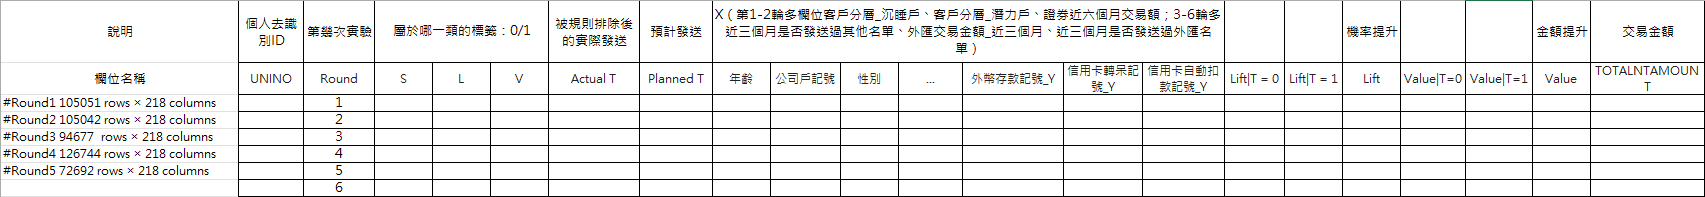

資料格式：
UNINO | Round | S | L | V | Actual T | Planned T |年齡| 公司戶記號 | 性別|	...	|外幣存款記號_Y | 信用卡轉呆記號_Y | 信用卡自動扣款記號_Y	| Lift|T = 0 |	Lift|T = 1| Lift |	Value|T=0 |	Value|T=1	| Value	| TOTALNTAMOUNT|

* Round1 105051 rows × 218 columns
* Round2 105042 rows × 218 columns
* Round3 94677  rows × 218 columns
* Round4 126744 rows × 218 columns
* Round5 72692 rows × 218 columns

In [ ]:
import pandas as pd
import numpy as np
Concat = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat['Round'] = Concat['Round'].astype(int)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499292,Z2229768430,5,1,0,1,0,0,52,0,2.0,...,1,0,0,0.002570,0.002496,0.000073,352012.038987,346376.124055,5635.914932,0.0
499293,Z2229905650,5,1,0,0,0,0,55,0,2.0,...,1,0,0,0.002563,0.002494,0.000069,349235.804756,345481.309683,3754.495073,0.0
499294,Z2229908250,5,1,0,0,0,0,53,0,2.0,...,1,0,0,0.002566,0.002495,0.000070,351849.579142,348113.971284,3735.607858,0.0
499295,Z2229996660,5,1,0,0,0,0,51,0,2.0,...,0,0,0,0.002571,0.002498,0.000074,350990.341278,346567.901923,4422.439356,0.0


In [ ]:
# Group by 'UNINO' and 'Round', and sum 'TOTALNTAMOUNT'
summed_df = Concat.groupby(['UNINO', 'Round'], as_index=False)['TOTALNTAMOUNT'].sum()

# Drop duplicates based on 'UNINO' and 'Round'
unique_df = Concat.drop_duplicates(subset=['UNINO', 'Round'])

# Merge the summed values back into the DataFrame without duplicates
Concat= pd.merge(unique_df.iloc[:,:-1], summed_df, on=['UNINO', 'Round'], how='left')
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496794,Z2229768430,5,1,0,1,0,0,52,0,2.0,...,1,0,0,0.002570,0.002496,0.000073,352012.038987,346376.124055,5635.914932,0.0
496795,Z2229905650,5,1,0,0,0,0,55,0,2.0,...,1,0,0,0.002563,0.002494,0.000069,349235.804756,345481.309683,3754.495073,0.0
496796,Z2229908250,5,1,0,0,0,0,53,0,2.0,...,1,0,0,0.002566,0.002495,0.000070,351849.579142,348113.971284,3735.607858,0.0
496797,Z2229996660,5,1,0,0,0,0,51,0,2.0,...,0,0,0,0.002571,0.002498,0.000074,350990.341278,346567.901923,4422.439356,0.0


In [ ]:
#Rounds 1-6 總共不重複的treatment & control個別有多少顧客?
# Initialize a dictionary to hold lengths for each round
lengths_by_round = {}

# Loop through each round from 1 to 6
for round_num in range(1, 6):
    # Filter rows for the current round where 'Actual T' == '1'
    filtered_df = Concat[(Concat['Round'] == round_num)]

    # Calculate lengths of strings in 'Actual T' for the filtered rows
    lengths =  len(filtered_df[filtered_df['Actual T'] == 1]), len(filtered_df[filtered_df['Actual T'] == 0])

    # Store the lengths in the dictionary
    lengths_by_round[round_num] = lengths

# Print the lengths for each round
lengths_by_round

{1: (44505, 59203),
 2: (42676, 56302),
 3: (40592, 54085),
 4: (56768, 69976),
 5: (31776, 40916)}

In [ ]:
#Rounds 1-6 總共不重複的treatment & control個別有多少顧客?
grouped_sum = Concat.groupby('UNINO')['Actual T'].sum()

# Count UNINOs with sum of 'Actual T' > 0
count_greater_than_zero = (grouped_sum > 0).sum()

# Count UNINOs with sum of 'Actual T' == 0
count_equal_to_zero = (grouped_sum == 0).sum()
print("Number of all people:", len(Concat['UNINO'].unique()))
print("Number of Treatment:", count_greater_than_zero)
print("Number of Control", count_equal_to_zero)

Number of all people: 191035
Number of Treatment: 121441
Number of Control 69594


In [ ]:
#有多少人收到1次、2次、3次....6次 treatment?
# Group by 'ID' and count the number of times 'Actual T' is 1 for each person
actual_t_counts = Concat.groupby('UNINO')['Actual T'].sum()
count_df = actual_t_counts.value_counts().reset_index().sort_values('Actual T', ascending=False)
count_df

,Actual T,count
5,5,935
4,4,5702
3,3,17729
2,2,38572
1,1,58503
0,0,69594


In [ ]:
#假設(1)裡面不重複的treatment有XT人次， (2)裡面不重複的control有XC人次，
#我們能組出資料集，裡面有XT人次和XC人次在這6個實驗月份每一round的X & Y (Deal or Value)嗎? 這樣子的資料集大小會變成 XT6 + XC6個rows
T = set(grouped_sum[grouped_sum > 0].index)
C = set(grouped_sum[grouped_sum == 0].index)
#Concat[Concat.UNINO.isin(T)] #366367
#Concat[Concat.UNINO.isin(C)] #130432
pd.concat([Concat[Concat.UNINO.isin(T)], Concat[Concat.UNINO.isin(C)]], axis = 0)

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
7,A1235450040,1,1,0,1,1,1,67,0,1.0,...,0,0,1,0.004525,0.029706,0.010257,763.606698,4721.470205,686.580980,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496775,Z2222443520,5,1,0,0,0,0,42,0,2.0,...,1,0,1,0.002617,0.002546,0.000071,350074.777048,345831.822107,4242.954941,0.0
496776,Z2222495050,5,1,0,0,0,1,54,0,2.0,...,1,0,1,0.002562,0.002494,0.000068,351114.877683,347646.596550,3468.281133,0.0
496783,Z2222847680,5,1,0,0,0,0,43,0,2.0,...,1,0,0,0.002633,0.002558,0.000075,349773.289425,346114.012734,3659.276691,0.0
496784,Z2222851530,5,1,0,0,0,0,49,0,2.0,...,1,0,0,0.002577,0.002501,0.000076,352434.747508,348598.817622,3835.929886,0.0
